In [2]:
# Function to install and load packages
import subprocess
import sys

def install_and_load(packages):
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of packages to install and load
packages = ["pandas", "numpy", "sklearn", "factor_analyzer", "matplotlib", "seaborn"]
install_and_load(packages)


In [3]:
import pandas as pd

# Load the data
survey_df = pd.read_csv('/Users/shreyamishra/Desktop/Survey.csv')
print(survey_df.shape)
print(survey_df.columns)
print(survey_df.head())
print(survey_df.info())


(70, 50)
Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Av

In [4]:
# Check for NA values
print(survey_df.isna().sum().sum())


0


In [5]:
# Select the relevant columns for PCA and factor analysis
sur_int = survey_df.iloc[:, 19:46]  # Columns 20 to 46 in Python are 19:46
print(sur_int.info())
print(sur_int.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   3. Proximity to transport                  70 non-null     int64  
 1   4. Proximity to work place                 70 non-null     int64  
 2   5. Proximity to shopping                   70 non-null     int64  
 3   1. Gym/Pool/Sports facility                70 non-null     int64  
 4   2. Parking space                           70 non-null     int64  
 5   3.Power back-up                            70 non-null     int64  
 6   4.Water supply                             70 non-null     int64  
 7   5.Security                                 70 non-null     int64  
 8   1. Exterior look                           70 non-null     int64  
 9   2. Unit size                               70 non-null     int64  
 10  3. Interior design and brand

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

# Perform PCA
pca = PCA(n_components=5)
pca_fit = pca.fit(sur_int_scaled)
print(pca.explained_variance_ratio_)
print(pca.components_)


[0.31822766 0.09526344 0.06889323 0.06341429 0.06111318]
[[ 1.49276587e-02 -5.26532839e-02 -2.10211853e-01 -1.80419220e-01
  -2.03748290e-01 -1.55293890e-01 -2.03859257e-01 -1.96651866e-01
  -2.19629828e-01 -5.43506790e-02 -2.59514035e-01 -2.29951976e-01
  -2.71175386e-01 -1.30693678e-01 -4.70217911e-03  2.95043360e-02
   5.15162914e-02  5.07457061e-02 -1.98477129e-01 -1.18254327e-01
  -2.53554825e-01 -2.13142745e-01 -2.69185464e-02 -2.88180575e-01
  -2.92769508e-01 -2.94955205e-01 -2.94392460e-01]
 [ 1.26411257e-01  6.01527039e-02 -2.70908994e-01  8.99167940e-02
   3.70040684e-02 -7.65588314e-02  1.63702992e-01  2.24748440e-02
  -3.16340689e-01  8.85312101e-02 -2.31063938e-02  2.27304792e-02
  -7.94293310e-02  2.05164355e-01 -4.03506723e-01 -2.66246056e-01
  -2.61889932e-01 -4.65933650e-01  1.82090697e-01 -1.90878205e-01
   1.32598358e-01 -1.56897193e-01 -2.70334357e-01 -1.65118969e-02
   1.67339322e-02  9.79421556e-03  4.60934585e-02]
 [-4.65915170e-01  5.26993480e-02  1.29611722e-01

In [7]:
from factor_analyzer import FactorAnalyzer

# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='promax')
fa.fit(sur_int_scaled)
print(fa.loadings_)
print(fa.get_factor_variance())


[[-6.26497168e-02  5.34488661e-02  1.02690930e-01  5.66766307e-01
  -1.08953461e-01]
 [ 2.14466457e-01 -2.42324045e-01 -1.56117204e-02 -5.96429951e-02
   6.57571599e-01]
 [ 2.39691678e-02  6.46405958e-01  2.73362374e-01 -1.18424851e-01
   1.70156024e-01]
 [ 3.55080024e-02  4.97715529e-01 -1.23070176e-01  1.75301013e-01
   1.43681439e-01]
 [ 1.41555008e-01  4.58574253e-01 -1.52465992e-01 -3.40737358e-02
   1.44277324e-01]
 [ 3.38511493e-02  3.24155769e-01  2.58810693e-02 -1.00512058e-01
   5.58963375e-01]
 [ 3.34491888e-01  2.95377627e-01  3.23026300e-02  6.17495210e-01
   1.06282875e-01]
 [-2.47295416e-01  9.63297251e-01 -8.31312413e-02  3.19566622e-01
  -1.38278270e-01]
 [ 3.57561505e-01  4.13705718e-01  2.86870145e-01 -4.04234546e-01
  -1.26285944e-01]
 [ 3.07274319e-01 -8.66436404e-02 -9.66132322e-02 -3.99986077e-02
  -2.98122169e-01]
 [ 4.08980897e-01  3.85737788e-01 -4.60642272e-02 -1.09581512e-01
   1.03988258e-01]
 [ 5.74897475e-01  7.29136459e-02 -7.79075399e-02 -1.75611551e-01

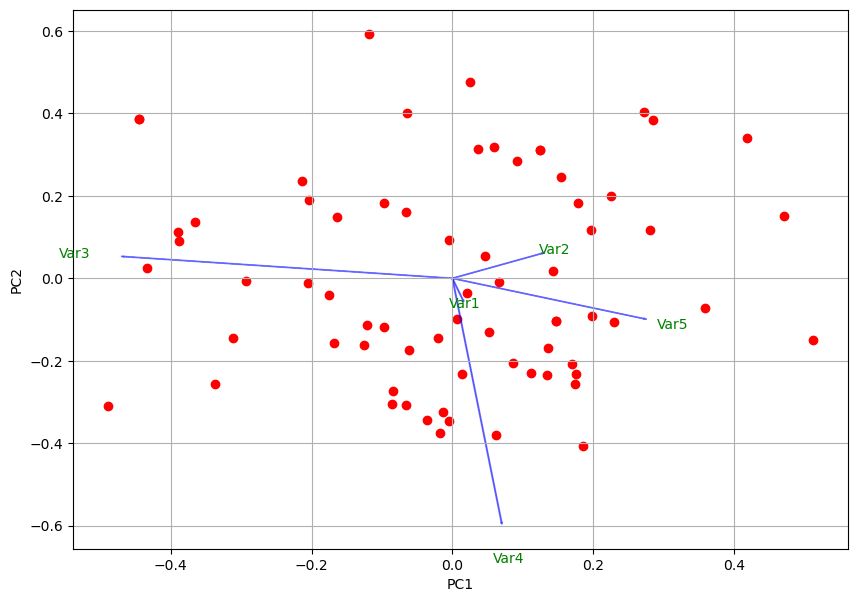

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biplot for PCA
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='r')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='b', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Project the data onto the principal components
pca_scores = pca.transform(sur_int_scaled)

# Create the biplot
plt.figure(figsize=(10, 7))
biplot(pca_scores, pca.components_)
plt.show()
